# 0. Import packages

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import LightSource
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st 
from scipy import signal
import scipy
from rasterio.plot import show
import rasterio
import shapefile as shp
import glob
from pyproj import Transformer

# 1. Load the basemap

In [2]:
with rasterio.open('imagery/LIMA_virtual_Mosaic_15m.tif') as src1:
    image_data = src1.read()

# 2. Load the GPS velocity data

In [3]:
gps_velocities = pd.read_csv('GPS_velocities/24-25_velocities-good.csv')

# 3. Load the borehole locations

In [4]:
sf = shp.Reader("Borehole_Locations/AH_core_locations_reproj.shp")

shapes = sf.shapes()
records = sf.records()

list_of_boreholes = ['ALHIC1902', 'ALHIC1903', 'ALHIC1901', 'ALHIC2201', 'ALHIC2301']

# 4. Load the Allan Hills bed topo map

In [17]:
# with rasterio.open('imagery/merged_bed_AH.tif') as src2:
#     bed_topo_data = src2.read()

with rasterio.open('DEMs/merged_AH_bed_topo_fix_smooth_100m.tif') as src2:
    bed_topo_data = src2.read()

# 5. Load the surface slope map
### Unused currently

In [6]:
with rasterio.open('imagery/slope_BedMachine_surface.tif') as src3:
    surface_slope_data = src3.read()

# 6. Load the flowlines

In [ ]:
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3031")

sf2 = shp.Reader("flowlines/manual_flowlines/borehole_flowlines_manual.shp")

man_shapes = sf2.shapes()
man_records = sf2.records()

flowlines = {}

for n, (shape, record) in enumerate(zip(man_shapes,man_records)):
    points = shape.points
    x, y = zip(*points)
    flow_points = np.array((x,y)).T
    flow_points = np.array([transformer.transform(i[1], i[0]) for i in flow_points])
    x, y = flow_points[:,0], flow_points[:,1]
    name = record[1]
    flowlines[name] = list([x,y])

# 7. Load the surface DEM

In [37]:
with rasterio.open('DEMs/rema_100m.tif') as src4:
    surface_dem_data = src4.read()

# N. Construct the map

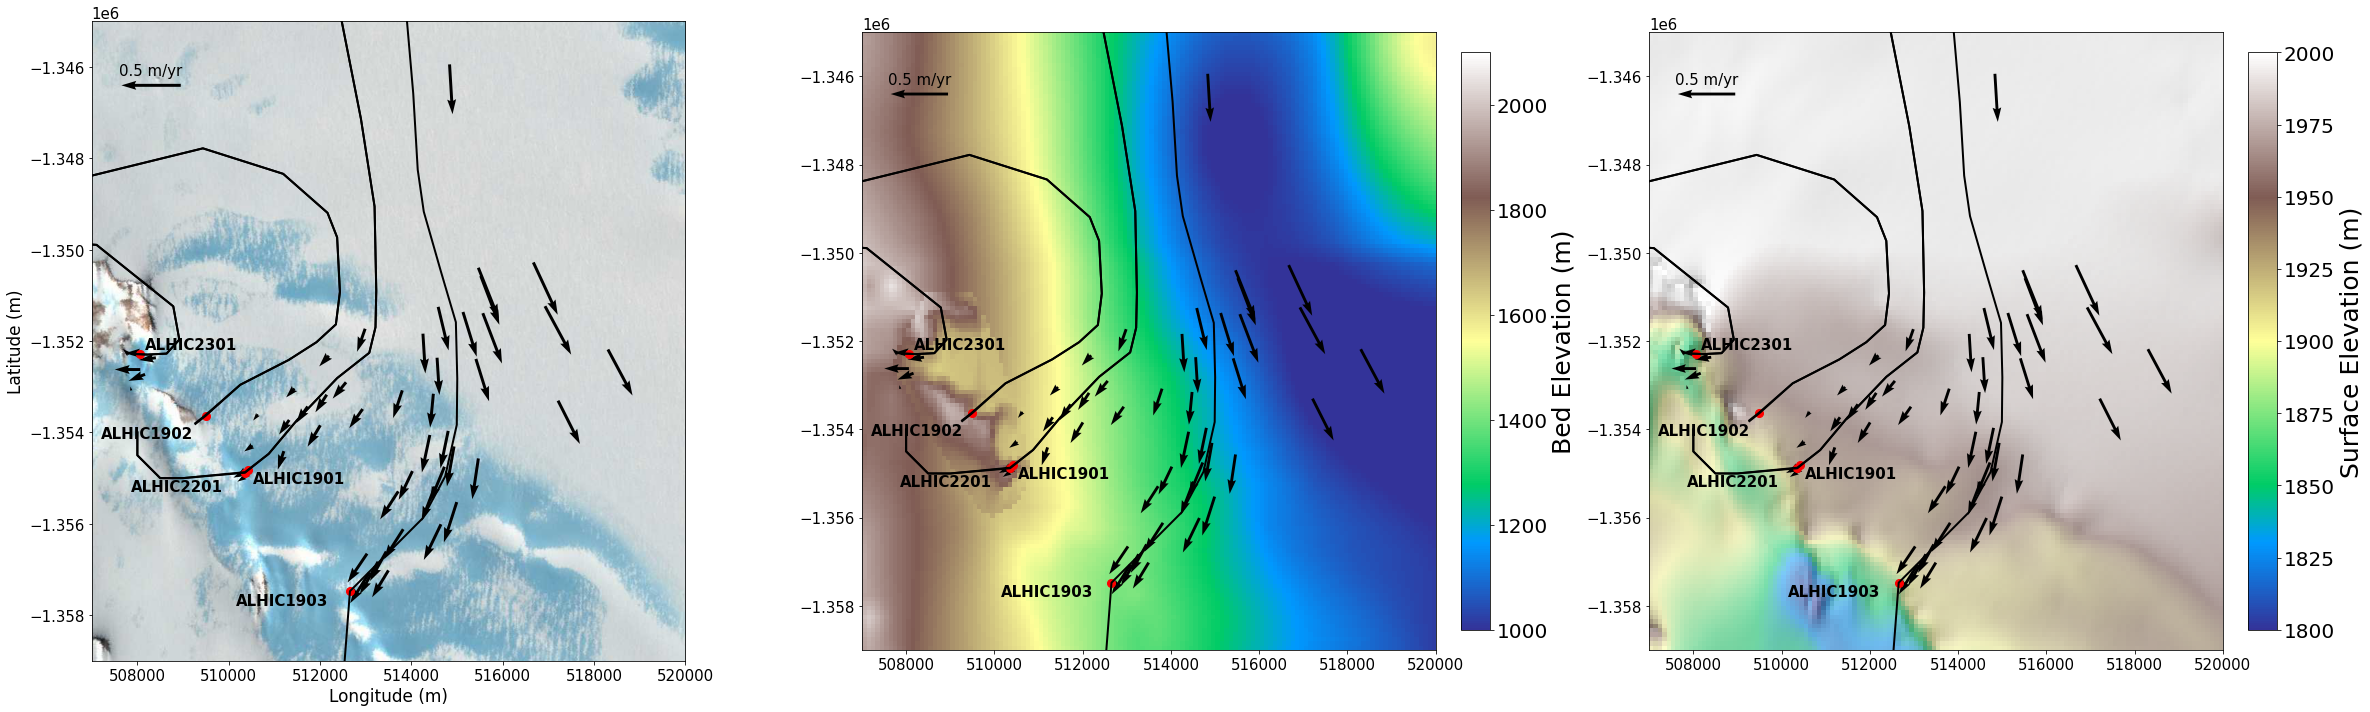

In [52]:
fig,axes = plt.subplots(1,3,figsize=(33,10))

axes[0].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis='both', labelsize=15)
axes[2].tick_params(axis='both', labelsize=15)

axes[0].yaxis.offsetText.set_fontsize(15)
axes[1].yaxis.offsetText.set_fontsize(15)
axes[2].yaxis.offsetText.set_fontsize(15)

n = 0
## Borehole locations
for shape, record in zip(shapes,records):
    points = shape.points
    x, y = zip(*points)

    if record[0] in list_of_boreholes:
        axes[0].plot(x, y, 'o',color='red', markersize=8)
        axes[1].plot(x, y, 'o',color='red', markersize=8)
        axes[2].plot(x, y, 'o',color='red', markersize=8)

        if record[0] == 'ALHIC2201':
            axes[0].annotate(str(record[0]), (x[0] - 2500, y[0] - 400),weight="bold", fontsize=15)
            axes[1].annotate(str(record[0]), (x[0] - 2500, y[0] - 400),weight="bold", fontsize=15)
            axes[2].annotate(str(record[0]), (x[0] - 2500, y[0] - 400),weight="bold", fontsize=15)
        elif record[0] == 'ALHIC1902':
            axes[0].annotate(str(record[0]), (x[0] - 2300, y[0] - 500),weight="bold", fontsize=15)
            axes[1].annotate(str(record[0]), (x[0] - 2300, y[0] - 500),weight="bold", fontsize=15)
            axes[2].annotate(str(record[0]), (x[0] - 2300, y[0] - 500),weight="bold", fontsize=15)
        elif record[0] == 'ALHIC1903':
            axes[0].annotate(str(record[0]), (x[0] - 2500, y[0] - 300),weight="bold", fontsize=15)
            axes[1].annotate(str(record[0]), (x[0] - 2500, y[0] - 300),weight="bold", fontsize=15)
            axes[2].annotate(str(record[0]), (x[0] - 2500, y[0] - 300),weight="bold", fontsize=15)
        elif record[0] == 'ALHIC1901':
            axes[0].annotate(str(record[0]), (x[0] + 100, y[0] - 300),weight="bold", fontsize=15)
            axes[1].annotate(str(record[0]), (x[0] + 100, y[0] - 300),weight="bold", fontsize=15)
            axes[2].annotate(str(record[0]), (x[0] + 100, y[0] - 300),weight="bold", fontsize=15)
        else:
            axes[0].annotate(str(record[0]), (x[0] + 100, y[0] + 100),weight="bold", fontsize=15)
            axes[1].annotate(str(record[0]), (x[0] + 100, y[0] + 100),weight="bold", fontsize=15)
            axes[2].annotate(str(record[0]), (x[0] + 100, y[0] + 100),weight="bold", fontsize=15)
    else:
        continue

## GPS velocity vectors
quiver1 = axes[0].quiver(gps_velocities['x'],gps_velocities['y'], 
                   gps_velocities['u'], gps_velocities['v'], 
                   scale = 1/0.2, label= "GPS velocity", 
                   width=5e-3)

quiver2 = axes[1].quiver(gps_velocities['x'],gps_velocities['y'], 
                   gps_velocities['u'], gps_velocities['v'], 
                   scale = 1/0.2, label= "GPS velocity", 
                   width=5e-3)

quiver3 = axes[2].quiver(gps_velocities['x'],gps_velocities['y'], 
                   gps_velocities['u'], gps_velocities['v'], 
                   scale = 1/0.2, label= "GPS velocity", 
                   width=5e-3)

axes[0].quiverkey(quiver1,0.1, 0.9, -0.5, label = '0.5 m/yr',fontproperties={'size':15})
axes[1].quiverkey(quiver2,0.1, 0.9, -0.5, label = '0.5 m/yr',fontproperties={'size':15})
axes[2].quiverkey(quiver3,0.1, 0.9, -0.5, label = '0.5 m/yr',fontproperties={'size':15})

axes[0].set_ylim([-1.359e6, -1.345e6])
axes[0].set_xlim([5.07e5, 5.2e5])

## LIMA basemap image
show(image_data, transform=src1.transform, ax=axes[0])



axes[0].set_ylabel('Latitude (m)', fontsize=17)
axes[0].set_xlabel('Longitude (m)', fontsize=17)


## Bed topo data
image_hidden = axes[1].imshow(bed_topo_data[0], 
                         cmap='terrain',vmin= 1000, vmax=2100)
topo = show(bed_topo_data, transform=src2.transform, ax=axes[1], cmap='terrain',vmin=1000, vmax=2100)
cbar = fig.colorbar(image_hidden, ax=axes[1], fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label='Bed Elevation (m)',size=25,)

axes[1].set_ylim([-1.359e6, -1.345e6])
axes[1].set_xlim([5.07e5, 5.2e5])



## Surface DEM map
ls = LightSource(azdeg=45, altdeg=45)
image_hidden2 = axes[2].imshow(surface_dem_data[0], cmap='terrain', extent=[src4.transform[2], src4.transform[2] + surface_dem_data[0].shape[1] * src4.transform[0],
                                   src4.transform[5] + surface_dem_data[0].shape[0] * src4.transform[4], src4.transform[5]],vmin = 1800,vmax=2000)
hillshade = axes[2].imshow(ls.hillshade(surface_dem_data[0], vert_exag=10, dx=src4.transform[0], dy=src4.transform[4]), cmap='gray', extent=[src4.transform[2], src4.transform[2] + surface_dem_data[0].shape[1] * src4.transform[0],
                                   src4.transform[5] + surface_dem_data[0].shape[0] * src4.transform[4], src4.transform[5]],alpha=0.5)

cbar = fig.colorbar(image_hidden2, ax=axes[2], fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label='Surface Elevation (m)',size=25,)

axes[2].set_ylim([-1.359e6, -1.345e6])
axes[2].set_xlim([5.07e5, 5.2e5])
## Flowlines

for flowline in flowlines:
    axes[0].plot(flowlines[flowline][0], flowlines[flowline][1], color='black', linewidth=2)
    axes[1].plot(flowlines[flowline][0], flowlines[flowline][1], color='black', linewidth=2)
    axes[2].plot(flowlines[flowline][0], flowlines[flowline][1], color='black', linewidth=2)



plt.tight_layout()
plt.savefig('Fig1.png', dpi=300, bbox_inches='tight')
plt.show()